In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
data=load_diabetes()
X=data.data
Y=data.target
df=pd.DataFrame(data.data,columns=data.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [41]:
data_standard=StandardScaler()
std_diabetes=data_standard.fit_transform(df)
std_diabetes

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]], shape=(442, 10))

In [42]:
df_ss_diabets=pd.DataFrame(std_diabetes)
df_ss_diabets.head()

,0,1,2,3,4,5,6,7,8,9
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [43]:
ss_mean=df_ss_diabets.mean()
ss_std=df_ss_diabets.std()
np.vstack((ss_mean,ss_std)).T

array([[-8.03781375e-18,  1.00113314e+00],
       [ 1.22074296e-16,  1.00113314e+00],
       [ 6.53072367e-18,  1.00113314e+00],
       [-1.14538846e-16,  1.00113314e+00],
       [ 5.52599696e-18,  1.00113314e+00],
       [-6.53072367e-18,  1.00113314e+00],
       [-1.10519939e-17,  1.00113314e+00],
       [ 1.27349112e-16,  1.00113314e+00],
       [ 8.60297253e-18,  1.00113314e+00],
       [-7.20577444e-17,  1.00113314e+00]])

In [44]:
Cov_=df_ss_diabets.cov()

In [45]:
Eigenvalue_Value,Eigenvalue_Vector=np.linalg.eig(Cov_)
Eigenvalue_Value

array([4.03333594, 1.49570362, 1.20870088, 0.95764302, 0.00858014,
       0.07849762, 0.66368294, 0.43466544, 0.60408378, 0.53778235])

In [46]:
pca=PCA(n_components=None)
pca_deabetes=pca.fit_transform(std_diabetes)
pca_deabetes

array([[ 0.58719913, -1.9468322 ,  0.58920548, ..., -0.75743079,
        -0.18107537, -0.04895286],
       [-2.83162538,  1.37208173,  0.02792987, ...,  0.18843634,
         0.50512797,  0.04359861],
       [ 0.27212855, -1.63490124,  0.73924374, ..., -0.84320298,
        -0.02535322, -0.05417517],
       ...,
       [-0.20520638, -1.20548723,  0.4961862 , ...,  0.49184884,
        -0.1132205 ,  0.05887482],
       [ 0.69287112,  0.2101271 , -0.86872416, ..., -0.07868363,
        -0.12721141, -0.04554011],
       [-1.90394067,  3.97577657, -0.04833791, ..., -1.18535938,
         0.73047454, -0.15455768]], shape=(442, 10))

In [47]:
explained_var=pca.explained_variance_ratio_
explained_var

array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171, 0.05365657, 0.0433682 , 0.007832  , 0.00085607])

In [48]:
Cumulative_var=np.cumsum(explained_var)
Cumulative_var

array([0.40242108, 0.55165304, 0.67224967, 0.76779731, 0.83401545,
       0.89428716, 0.94794372, 0.99131192, 0.99914393, 1.        ])

In [49]:
df_pca=pd.DataFrame(columns=['explained_var','Cumulative_var'])
df_pca['Cumulative_var']=Cumulative_var
df_pca['explained_var']=explained_var #مقادیر ویژه (Eigenvalues)
df_pca

,explained_var,Cumulative_var
0,0.402421,0.402421
1,0.149232,0.551653
2,0.120597,0.672250
3,0.095548,0.767797
4,0.066218,0.834015
5,0.060272,0.894287
6,0.053657,0.947944
7,0.043368,0.991312
8,0.007832,0.999144
9,0.000856,1.000000


با توجه به جدول PCA مشاهده میشود برای پوشش تقریبا 80% درصد واریانس داده ها به 5 مولفه نیاز داریم و برای پوشش تقریبا 90% درصد واریانس به 6 نمونه احتیاج داریم.

In [50]:
loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=[f'PC{i+1}' for i in range(df.shape[1])])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
age,0.216431,0.044367,0.494668,0.414012,0.686876,-0.225815,-0.109530,-0.014937,0.008100,0.003263
sex,0.186967,-0.386547,-0.106864,0.679860,-0.373464,0.041705,-0.067622,-0.442933,-0.002106,0.003660
bmi,0.303162,-0.156281,0.167527,-0.499825,-0.129333,-0.403151,-0.519874,-0.392922,0.042377,0.008247
bp,0.271738,-0.138266,0.513571,0.019662,-0.486874,-0.272783,0.320655,0.477360,0.027194,-0.003222
s1,0.343255,0.573027,-0.068579,0.068396,-0.129180,0.005398,0.073644,-0.129411,-0.042038,0.709775
s2,0.351861,0.455942,-0.269689,0.167774,-0.116722,-0.133262,-0.230535,0.191325,-0.359316,-0.563195
s3,-0.282437,0.506239,0.386032,0.076020,-0.245001,0.106354,-0.007548,-0.324635,0.481247,-0.317445
s4,0.428834,-0.068181,-0.380680,-0.007921,0.143646,-0.033936,0.071244,0.180587,0.773817,-0.090596
s5,0.378618,-0.026187,0.063630,-0.264427,0.151639,0.178731,0.647302,-0.449684,-0.189460,-0.264466
s6,0.322183,-0.084949,0.276842,-0.087085,-0.031423,0.805066,-0.357267,0.166608,-0.015274,0.002611


In [51]:

loadings.PC1.sort_values()

s3    -0.282437
sex    0.186967
age    0.216431
bp     0.271738
bmi    0.303162
s6     0.322183
s1     0.343255
s2     0.351861
s5     0.378618
s4     0.428834
Name: PC1, dtype: float64

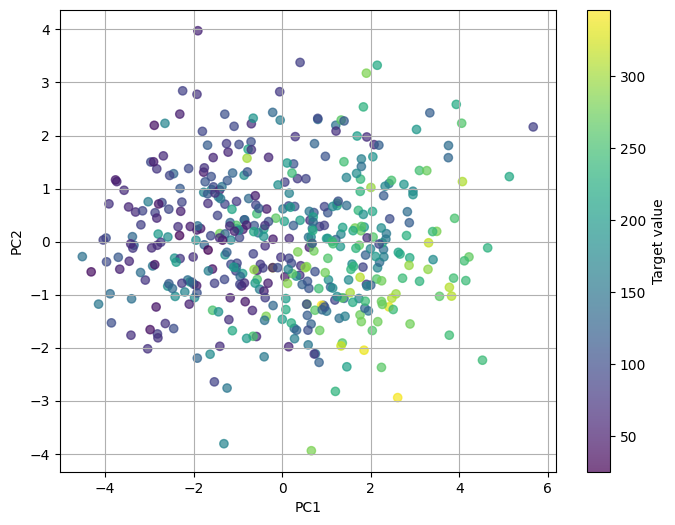

In [52]:
pca_deabetes=pca.fit_transform(std_diabetes)
PC1=pca_deabetes[:,0]
PC2=pca_deabetes[:,1]
plt.figure(figsize=(8,6))
plt.scatter(PC1, PC2, c=Y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target value')
plt.grid(True)
plt.show()

مزایای استفاده از فضای کاهش یافته PCA

کاهش بعد داده‌ها و ساده‌تر شدن مدل:

یکی از بزرگ‌ترین مزایای PCA این است که می‌توان تعداد زیادی ویژگی اولیه را به چند مؤلفه اصلی کاهش داد.

این کار باعث می‌شود مدل یادگیری ساده‌تر شود، محاسبات سریع‌تر انجام شود و حافظه کمتری مصرف شود.

کاهش نویز و حذف هم‌خطی:

ویژگی‌هایی که واریانس بسیار کمی دارند معمولاً حاوی نویز هستند یا اطلاعات تکراری ارائه می‌دهند.

با حذف این مؤلفه‌ها، مدل می‌تواند تمرکز بیشتری روی تغییرات واقعی و مهم داده‌ها داشته باشد.

همچنین PCA رابطه خطی بین ویژگی‌ها را کاهش می‌دهد، چون مؤلفه‌ها عمود بر هم هستند.

معایب و محدودیت‌ها

از بین رفتن تفسیرپذیری:

مؤلفه‌های PCA ترکیبی خطی از ویژگی‌های اصلی هستند.

وقتی مدل با این مؤلفه‌ها آموزش داده می‌شود، دشوار است بگوییم “کدام ویژگی اصلی بیشترین تأثیر را داشته است”.

احتمال حذف اطلاعات مفید با واریانس پایین:

PCA مؤلفه‌ها را بر اساس میزان واریانس رتبه‌بندی می‌کند و مؤلفه‌هایی که واریانس کمی دارند را حذف می‌کند.

گاهی اوقات، ویژگی‌های مهم برای پیش‌بینی ممکن است واریانس کمی داشته باشند، بنابراین حذف آن‌ها می‌تواند اطلاعات ارزشمند را از بین ببرد.

جمع‌بندی کوتاه

PCA باعث کاهش بعد، ساده‌تر شدن مدل و کاهش نویز می‌شود، ولی به قیمت از دست رفتن تفسیرپذیری و احتمال حذف اطلاعات مهم با واریانس پایین.

به همین دلیل، قبل از استفاده از PCA، باید اهداف مدل و اهمیت تفسیرپذیری ویژگی‌ها را در نظر گرفت.
